# Project Name:- Spending on Ecommerce Website

# Problem Statement-
Predict the yearly amount spent by customers based on data taken from customers about their presence on website and their membership of application.

#### Steps Involved in Project
1) Data Importing
2) Exploratory Data Analysis
3) Data Preprocessing
4) Checking Multicollinearity
5) Model building & Evaluation
6) Checking prediction

#### Importing important Libraries

In [363]:
#Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score,mean_squared_error
import math
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge

In [364]:
#Reading Dataset

df = pd.read_csv('Ecommerce Customers (2).csv')

In [365]:
# Reading first 5 rows
df.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [366]:
#Checking shape
df.shape

(500, 8)

In [367]:
#checking datatype and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [368]:
#checking null values
df.isnull().sum()

Email                   0
Address                 0
Avatar                  0
Avg. Session Length     0
Time on App             0
Time on Website         0
Length of Membership    0
Yearly Amount Spent     0
dtype: int64

In [369]:
#checking datatype
df.dtypes

Email                    object
Address                  object
Avatar                   object
Avg. Session Length     float64
Time on App             float64
Time on Website         float64
Length of Membership    float64
Yearly Amount Spent     float64
dtype: object

In [370]:
#checking unique values
df['Avatar'].value_counts()

SlateBlue               7
Cyan                    7
CadetBlue               7
GreenYellow             7
Teal                    7
                       ..
MediumPurple            1
CornflowerBlue          1
LightGoldenRodYellow    1
PowderBlue              1
LawnGreen               1
Name: Avatar, Length: 138, dtype: int64

In [371]:
#checking column names
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [372]:
#describe statistics of data
df.describe().style.background_gradient(cmap='winter')

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


In [373]:
#checking unique values in each column
df.nunique()

Email                   500
Address                 500
Avatar                  138
Avg. Session Length     500
Time on App             500
Time on Website         500
Length of Membership    500
Yearly Amount Spent     500
dtype: int64

## EDA

<AxesSubplot:>

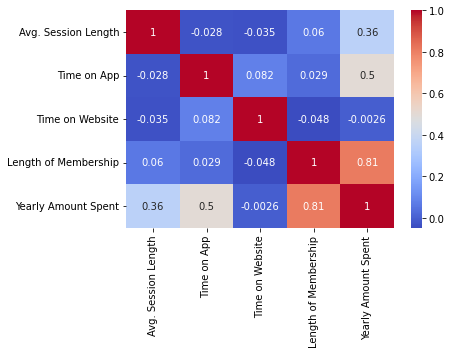

In [374]:
# Looking for correlation between variables
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

#### Checking outliers using boxplots

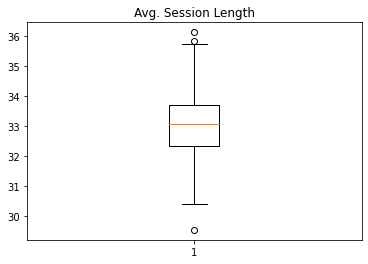

In [375]:
#Boxplots
# plotting boxplot using 'Avg. Session Length'
plt.boxplot(df['Avg. Session Length'])
plt.title('Avg. Session Length')
plt.show()

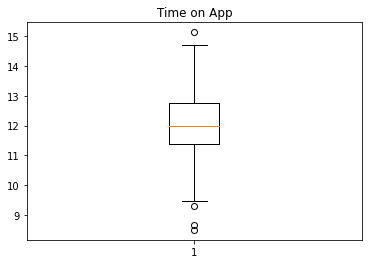

In [376]:
# plotting boxplot using 'Time on App'
plt.boxplot(df['Time on App'])
plt.title('Time on App')
plt.show()

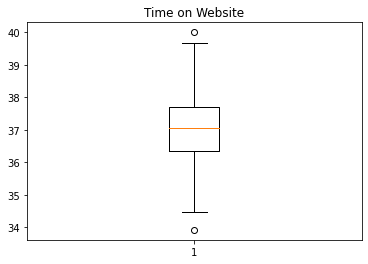

In [377]:
# plotting boxplot using 'Time on Website'
plt.boxplot(df['Time on Website'])
plt.title('Time on Website')
plt.show()

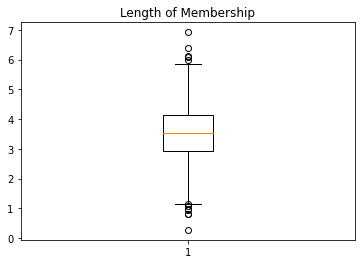

In [378]:
# plotting boxplot using 'Length of Membership'
plt.boxplot(df['Length of Membership'])
plt.title('Length of Membership')
plt.show()

Conclusion - There are no extreme outliers and only few are present, so we are not removing it

#### Checking relationships numeric between features using scatterplots

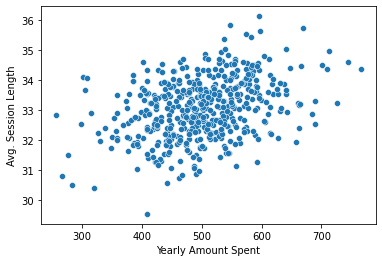

In [379]:
# Scatterplots
# plotting scatterplot 'Yearly Amount Spent' vs 'Avg. Session Length'
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Avg. Session Length')
plt.show()

In [380]:
df.columns

Index(['Email', 'Address', 'Avatar', 'Avg. Session Length', 'Time on App',
       'Time on Website', 'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

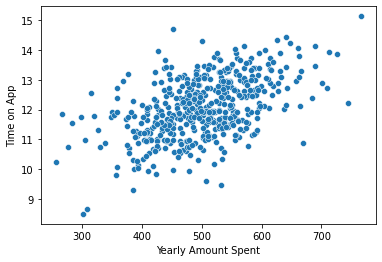

In [381]:
# plotting scatterplot 'Yearly Amount Spent' vs 'Avg. 'Time on App'
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Time on App')
plt.show()

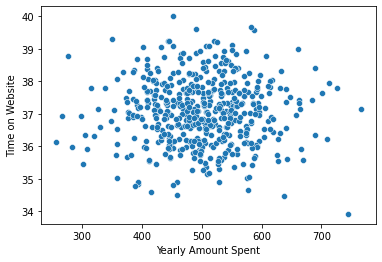

In [382]:
# plotting scatterplot 'Yearly Amount Spent' vs 'Avg. 'Time on Website'
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Time on Website')
plt.show()

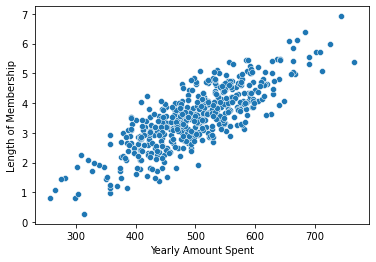

In [383]:
# plotting scatterplot 'Yearly Amount Spent' vs 'Avg. 'Length of Membership'
sns.scatterplot(data=df,x='Yearly Amount Spent',y='Length of Membership')
plt.show()

### Preprocessing of Data

In [384]:
# seperating dependent and independent features

X = df.iloc[:,3:-1]

y = df.iloc[:,-1]

In [385]:
#Checking first five rows
X.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308


In [386]:
y.head()

0    587.951054
1    392.204933
2    487.547505
3    581.852344
4    599.406092
Name: Yearly Amount Spent, dtype: float64

Yearly amount spent is highly correlated with Length of Membership

#### Scaling the features using standardisation method

In [387]:
#create scaler instance
scaler = StandardScaler()

In [388]:
# # Create new scaled data dataframe
X = pd.DataFrame(scaler.fit_transform(X),columns=X.columns,index=X.index)
X.head()

#### Splitting data into train and test set

In [389]:
from sklearn.model_selection import train_test_split

In [390]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [391]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(400, 4)
(100, 4)
(400,)
(100,)


## modelling

#### LinearRegression

In [392]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression()

linear_regressor.fit(X_train,y_train)

predictions = linear_regressor.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9778130629184127
****************************************************************************************************
MSE is 109.86374118393988
****************************************************************************************************
RMSE is 10.48159058463647


In [336]:
print(y_test.head())
print('\n')
print(predictions[:5])

361    401.033135
73     534.777188
374    418.602742
155    503.978379
104    410.069611
Name: Yearly Amount Spent, dtype: float64


[402.86230051 542.53325708 426.62011918 501.91386363 409.6666551 ]


Text(0.5, 1.0, 'Residual errors')

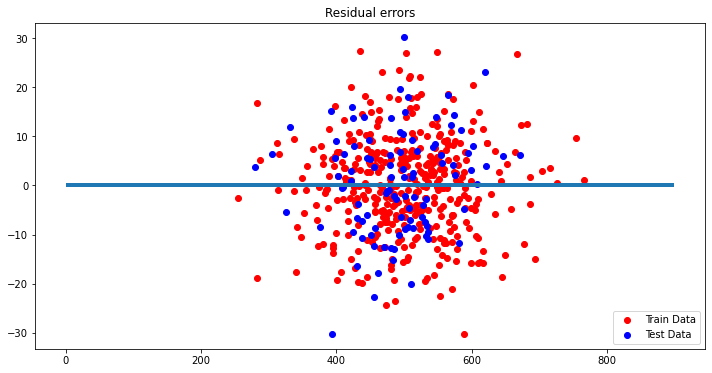

In [337]:
# Plotting residual errors
plt.figure(figsize=(12,6))
plt.scatter(linear_regressor.predict(X_train), linear_regressor.predict(X_train) - y_train, color='red',label='Train Data')
plt.scatter(linear_regressor.predict(X_test), linear_regressor.predict(X_test) - y_test, color='blue',label='Test Data')
plt.hlines(xmin=0,xmax=900,y=0,linewidth=4)
plt.legend(loc=4)
plt.title('Residual errors')

### Ridge and lasso

In [338]:
lasso = Lasso()
ridge = Ridge()
lasso.fit(X_train,y_train)
ridge.fit(X_train,y_train)
lasso_pred = lasso.predict(X_test)
ridge_pred = ridge.predict(X_test)
print('Lasso model test score',lasso.score(X_test,y_test))
print('Ridge model test score',ridge.score(X_test,y_test))

Lasso model test score 0.977670404669426
Ridge model test score 0.9778954738144373


In [339]:
model = sm.OLS(y,X).fit()
print(model.summary())
print('Training score',linear_regressor.score(X_train,y_train))
print('Test score',linear_regressor.score(X_test,y_test))

                                 OLS Regression Results                                 
Dep. Variable:     Yearly Amount Spent   R-squared (uncentered):                   0.024
Model:                             OLS   Adj. R-squared (uncentered):              0.016
Method:                  Least Squares   F-statistic:                              3.072
Date:                 Sun, 15 Jan 2023   Prob (F-statistic):                      0.0162
Time:                         20:20:19   Log-Likelihood:                         -3816.2
No. Observations:                  500   AIC:                                      7640.
Df Residuals:                      496   BIC:                                      7657.
Df Model:                            4                                                  
Covariance Type:             nonrobust                                                  
                           coef    std err          t      P>|t|      [0.025      0.975]
---------------------

## Random Forest Regressor

In [340]:
from sklearn.ensemble import RandomForestRegressor

random_forest = RandomForestRegressor()

random_forest.fit(X_train,y_train)

predictions = random_forest.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9313001584486228
****************************************************************************************************
MSE is 340.18312594584654
****************************************************************************************************
RMSE is 18.44405394553612


## KNeighbors Regressor

In [341]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor()

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.907919572425672
****************************************************************************************************
MSE is 455.95749543671315
****************************************************************************************************
RMSE is 21.353161251597225


## Gradient Boosting Regressor

In [342]:
from sklearn.ensemble import GradientBoostingRegressor

GBR = GradientBoostingRegressor()

GBR.fit(X_train,y_train)

predictions = GBR.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9564243697798772
****************************************************************************************************
MSE is 215.7747931959312
****************************************************************************************************
RMSE is 14.689274767527879


## DecisionTreeRegressor

In [343]:
from sklearn.tree import DecisionTreeRegressor

DTR = DecisionTreeRegressor()

DTR.fit(X_train,y_train)

predictions = DTR.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8552642221393297
****************************************************************************************************
MSE is 716.6926187453398
****************************************************************************************************
RMSE is 26.77111538104716


In [344]:
from sklearn.ensemble import AdaBoostRegressor

ADA = AdaBoostRegressor()

ADA.fit(X_train,y_train)

predictions = ADA.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8738944978646361
****************************************************************************************************
MSE is 624.4405073816174
****************************************************************************************************
RMSE is 24.988807642254912


## XGB Regressor

In [345]:
from xgboost import XGBRegressor

XGB = AdaBoostRegressor()

XGB.fit(X_train,y_train)

predictions = XGB.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8708127444457134
****************************************************************************************************
MSE is 639.7005209095873
****************************************************************************************************
RMSE is 25.292301613526345


In [346]:
# Helper function for comparing models metrics
def compare_models(models,names,X_train,y_train,X_test,y_test):
# the libraries we need
    import sklearn.metrics as metrics
    from sklearn.model_selection import train_test_split


    # now, create a list with the objects 
    data = {'Metric':['rmse','MedAE','MAE','R-squared']}
    df_train = pd.DataFrame(data)
    df_test = pd.DataFrame(data)

    def rmse(x,y):
        return math.sqrt(((x-y)**2).mean())


    for (model,name) in zip(models,names):
        y_pred= model.predict(X_test) # then predict on the test set
        res = [rmse(model.predict(X_train), y_train),rmse(model.predict(X_test), y_test),
               metrics.median_absolute_error(model.predict(X_train), y_train),metrics.median_absolute_error(model.predict(X_test), y_test),
               metrics.mean_absolute_error(model.predict(X_train), y_train),metrics.mean_absolute_error(model.predict(X_test), y_test),
               metrics.r2_score(model.predict(X_train), y_train),metrics.r2_score(model.predict(X_test), y_test)]
    # get metrics of each model, and add to dataframe 
        df_train[name] = [res[0], res[2], res[4], res[6]]
        df_test[name] = [res[1], res[3], res[5], res[7]]
    return df_train,df_test   

In [347]:
# list of models object
models = [linear_regressor, random_forest, knn, GBR, DTR, ADA, XGB]

# list of models name
models_name = ['LGDM','XGB','AdaBo','DT','GB','RF']

# use function for comparing models by passing list of models object, names, train and test data
comp_model_train, comp_model_test = compare_models(models, numerical, X_train, y_train, X_test, y_test)

In [348]:
# printing comparision of model on train and test
comp_model_train

,Metric,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,rmse,9.788898,7.236610,19.269873,6.632980
1,MedAE,5.988784,3.756529,10.765195,4.337198
2,MAE,7.727001,5.156294,14.144070,5.241920
3,R-squared,0.985208,0.991209,0.921206,0.993178


In [349]:
comp_model_test

,Metric,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,rmse,10.481591,18.444054,21.353161,14.689275
1,MedAE,7.324397,10.828009,12.908361,10.129862
2,MAE,8.558442,13.788712,16.365631,11.765485
3,R-squared,0.978263,0.919749,0.871123,0.953100


# Hyperparameter Tuning

In [350]:
from sklearn.model_selection import RandomizedSearchCV

### RandomForest

#### RandomizedCV on Random Forest Regressor

In [351]:
rf_param_grid = {'n_estimators':[25,50,100],
                'min_samples_split':[2,4,6],
                'min_samples_leaf':[1,2,3],
                'max_features':['auto','sqrt'],
                'max_depth':[2,4,6,8],
                'bootstrap':[True,False]}
rf = RandomizedSearchCV(estimator=RandomForestRegressor(),param_distributions=rf_param_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
rf.fit(X_train,y_train)

print(rf.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


{'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 8, 'bootstrap': True}


#### Fitting best parameters in Random Forest Regressor

In [352]:
rf = RandomForestRegressor(n_estimators=50,min_samples_split=2,min_samples_leaf=1,
                          max_features='auto',max_depth=8,bootstrap=True)

rf.fit(X_train,y_train)

rf.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


R2 score is :,0.8708127444457134
****************************************************************************************************
MSE is 639.7005209095873
****************************************************************************************************
RMSE is 25.292301613526345


### KNeighbors

#### RandomizedCV on KNeighbors

In [353]:
knn_param_grid = {'p':[1,2,3],
                'n_neighbors':[3,5,10,15],
                'leaf_size':[2,4,6,8]
                 }
knn = RandomizedSearchCV(estimator=KNeighborsRegressor(),param_distributions=knn_param_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
knn.fit(X_train,y_train)

print(knn.best_params_)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 48 is smaller than n_iter=100. Running 48 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'p': 2, 'n_neighbors': 3, 'leaf_size': 2}


#### Fitting best parameters in KNeighbors

In [354]:
knn = KNeighborsRegressor(p=2,n_neighbors=5,leaf_size=2)

knn.fit(X_train,y_train)

predictions = knn.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.907919572425672
****************************************************************************************************
MSE is 455.95749543671315
****************************************************************************************************
RMSE is 21.353161251597225


### AdaBoostRegressor

#### RandomizedCV on AdaBoostRegressor

In [355]:
Ada_para_grid={
    'n_estimators':[50,100,150],
    'learning_rate':[0.5,0.25,0.1,0.05,0.01]
}

ADA = RandomizedSearchCV(estimator=AdaBoostRegressor(),param_distributions=Ada_para_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
ADA.fit(X_train,y_train)

print(ADA.best_params_)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:306: UserWarning: The total space of parameters 15 is smaller than n_iter=100. Running 15 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


{'n_estimators': 150, 'learning_rate': 0.5}


#### Fitting best parameters in AdaBoostRegressor

In [356]:
ADA = AdaBoostRegressor(n_estimators=150, learning_rate=0.5)

ADA.fit(X_train,y_train)

predictions = ADA.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.8835614924201012
****************************************************************************************************
MSE is 576.5721520533123
****************************************************************************************************
RMSE is 24.011916875862124


### XGBoost

#### RandomizedCV on AdaBoostRegressor

In [357]:
xgb_para_grid={
    'min_child_weight':[1,2,3],
    'max_depth':[3,5,7],
    'learning_rate':[0.05,0.10,0.15],
    'gamma':[0.0,0.1,0.02],
    'colsample_bytree':[0.3,0.4]
}

XGB = RandomizedSearchCV(estimator=XGBRegressor(),param_distributions=xgb_para_grid,n_iter=100,
                        verbose=2,random_state=100,n_jobs=-1)
XGB.fit(X_train,y_train)

print(XGB.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
{'min_child_weight': 3, 'max_depth': 3, 'learning_rate': 0.15, 'gamma': 0.1, 'colsample_bytree': 0.4}


#### Fitting best parameters in XGBoost

In [358]:
XGB = XGBRegressor(min_child_weight=3,max_depth=3,learning_rate=0.15,gamma=0.1,colsample_bytree=0.4)

XGB.fit(X_train,y_train)

predictions = XGB.predict(X_test)

print(f'R2 score is :,{r2_score(y_test,predictions)}')
print('*'*100)
# Mean squared error
print(f'MSE is {mean_squared_error(y_test,predictions)}')
print('*'*100)
# Root Mean squared error
print(f'RMSE is {np.sqrt(mean_squared_error(y_test,predictions))}')

R2 score is :,0.9566319780115735
****************************************************************************************************
MSE is 214.74677310686445
****************************************************************************************************
RMSE is 14.65424078916627


# Checking predictions

In [393]:
input_data = (34.497268,12.655651,39.577668,4.082621)

arr = np.asarray(input_data)

reshaped_arr = arr.reshape(1,-1)

prediction = linear_regressor.predict(reshaped_arr)

print(prediction)

[594.58304169]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Best Model is Linear regression

#### Coefficient values

In [394]:
linear_regressor.coef_

array([25.5962591 , 38.78534598,  0.31038593, 61.89682859])

## Conclusion

Holding all other features fixed, a 1 unit increase in Avg. Session Length is associated with an increase of 25.38 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on App is associated with an increase of 38.52 total dollars spent.

Holding all other features fixed, a 1 unit increase in Time on Website is associated with an increase of 0.31 total dollars spent.

Holding all other features fixed, a 1 unit increase in Length of Membership is associated with an increase of 61.29 total dollars spent.